Query Options
============

This notebook is just to help set up a list of query templates to see the performance impact of various features and options. Actual performance analysis will be in other notebooks.

- Current 'full' query (FULL)
- Query with OA filter set properly (FIX_OA) (See [this issue](https://github.com/ukwa/ukwa-ui/issues/249))
- Query only using the minimal facets actually required by the UI.
- Query with 
- Query with [facet threads > 0](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.threadsParameter) so the facet work in multithreaded and see if that helps.
- Query with [facet exists](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.existsParameter) so we only check a facet is present, and don't bother counting the number of documents.
- Query with [facet method enum](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.methodParameter) for low-cardinality facets (public_suffix, content_type_norm).
- Adding grouping-by-URL (GROUP_URL)


In [135]:
q = {}

# The base query used by UKWA-UI 1.2.8, when 'Accessible In Reading Rooms' is selected (not just OA)
q['baseline'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%7B%21tag%3DfilterFirstLayer%7Daccess_terms%3A%5B%27%27+TO+*%5D&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=host&\
facet.field=domain&\
facet.field=collection&\
facet.field=content_type_norm&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# Same, but taking out the no-op access_terms fq bit:
q['no_no_op'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=host&\
facet.field=domain&\
facet.field=collection&\
facet.field=content_type_norm&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As no_no_op, but dropping fields that appear not to contribute to the search results:
q['min_fields'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
fl=url,title&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"


# As no_no_op, but dropping facets that appear not to contribute to the search results:
q['min_facets'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As min_facets, but enable grouping by URL
q['group_by_url'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
group=true&\
group.field=url&\
group.main=true&\
wt=json&indent=true&\
version=2.2"

# As min_facets, but enable grouping by URL and only return 10 results
q['group_by_url_10'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=10&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
group=true&\
group.field=url&\
group.main=true&\
wt=json&indent=true&\
version=2.2"

# As min_facets, no highlighting
q['no_hl'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&indent=true&\
version=2.2"

# As min_facets, but use multiple threads for faceting:
q['facet_threads'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.threads=8&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As min_facets, but only checking if the type facets are present rather than counting the number of documents with each facet value
q['facets_exist'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.type.exists=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"


# As min_facets, but use different facet counting method for low-cardinality fields:
q['facet_some_enum'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.public_suffix.method=enum&\
facet.field=type&\
facet.type.method=enum&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
facet.access_terms.method=enum&\
version=2.2"


import requests
import json
import random
import pandas as pd

#endpoint = "http://solr.api.wa.bl.uk/solr/NPLD-FC2013-20190220"
#endpoint = "http://solr.api.wa.bl.uk/solr/NPLD-DC2015-20190311"
endpoint = "http://solr.api.wa.bl.uk/solr/NPLD-FC2015-20191108-jbod"

print("BEGIN")

q_type = []
q_hits = []
q_time = []

for i in range(1,25):
    search_terms = ['jackson', 'hats', 'lozenge', 'foul', 'fowl', 'concrete', 'laugh', 'trampoline', 'earnest', 'pop', 
                    'apple', 'gum', 'trip', 'past', 'disastrous', 'fat', 'subsequent', 'wandering', 
                    'finger', 'squeeze', 'shock', 'stomach', 'peaceful', 'fax', 'scrub', 'stir', 'selection', 
                    'ragged', 'curtain', 'tested', 'satisfying', 'imported', 'dusty', 'silent', 'request', 
                    'hydrant', 'steam', 'phone', 'slow', 'political', 'word', 'change', 'soda', 'wall', 'testy', 
                    'petite', 'ice', 'abhorrent', 'drawer', 'parcel', 'prefer', 'twist', 'back', 'meek', 'account', 
                    'fence', 'underwear', 'report', 'faithful', 'visit', 'box', 'ethereal', 'scrape', 'productive']
    random.shuffle(search_terms)
    for key in q:
        #
        search_term = search_terms.pop()
        #
        r = requests.get(q[key].format(endpoint, search_term))
        results = json.loads(r.text)
        if r.status_code == 200:
            hits = results.get('response',{}).get('numFound',None)
            if hits is None:
                #print(r.text)
                hits = results['grouped']['url']['matches']
            print(search_term, key, r.status_code, r.elapsed.total_seconds(), hits)
            # Store
            if hits > 0:
                q_type.append(key)
                q_hits.append(hits)
                q_time.append(r.elapsed.total_seconds())
        else:
            print(r.text)
        
print("DONE")

q_data = {
    'type': q_type,
    'hits': q_hits,
    'time': q_time
}

df_fc2015j = pd.DataFrame(q_data)


BEGIN
concrete baseline 200 0.062645 0
testy no_no_op 200 0.539089 35003
selection min_fields 200 0.428136 8016133
scrub min_facets 200 0.860143 376373
trampoline group_by_url 200 0.407766 351130
box group_by_url_10 200 1.837023 18691576
productive no_hl 200 0.185352 957744
account facet_threads 200 1.01426 76705333
visit facets_exist 200 2.046168 92470993
wandering facet_some_enum 200 0.200136 510762
ethereal baseline 200 0.064655 0
wandering no_no_op 200 0.19731 510762
laugh min_fields 200 0.232769 3258062
dusty min_facets 200 0.16834 305225
gum group_by_url 200 0.611387 402122
apple group_by_url_10 200 0.786544 7655646
disastrous no_hl 200 0.226451 1447872
parcel facet_threads 200 0.211653 898254
request facets_exist 200 0.835051 18443944
hats facet_some_enum 200 0.21682 1310028
box baseline 200 0.061085 0
fowl no_no_op 200 0.121658 108013
underwear min_fields 200 0.174351 1984233
squeeze min_facets 200 0.34215 1577719
ragged group_by_url 200 0.380243 220572
disastrous group_by_url_

stomach no_no_op 200 0.277913 2377041
earnest min_fields 200 0.124743 450027
foul min_facets 200 0.297376 1732532
scrub group_by_url 200 0.541578 376373
fat group_by_url_10 200 0.497532 4358160
silent no_hl 200 0.237353 2441994
ragged facet_threads 200 0.135466 220572
selection facets_exist 200 0.412024 8016133
hydrant facet_some_enum 200 0.105955 22125
jackson baseline 200 0.027432 0
steam no_no_op 200 0.308464 2027978
dusty min_fields 200 0.132031 305225
subsequent min_facets 200 0.260586 1642954
visit group_by_url 200 6.039362 92470993
wandering group_by_url_10 200 0.282249 510762
fat no_hl 200 0.238724 4358160
twist facet_threads 200 0.255285 2462423
parcel facets_exist 200 0.138156 898254
selection facet_some_enum 200 0.417205 8016133
word baseline 200 0.048308 0
parcel no_no_op 200 0.253024 898254
phone min_fields 200 1.187802 53230151
trampoline min_facets 200 0.184184 351130
political group_by_url 200 1.882503 20762361
abhorrent group_by_url_10 200 0.139178 194387
earnest no_hl

We can now plot the results...

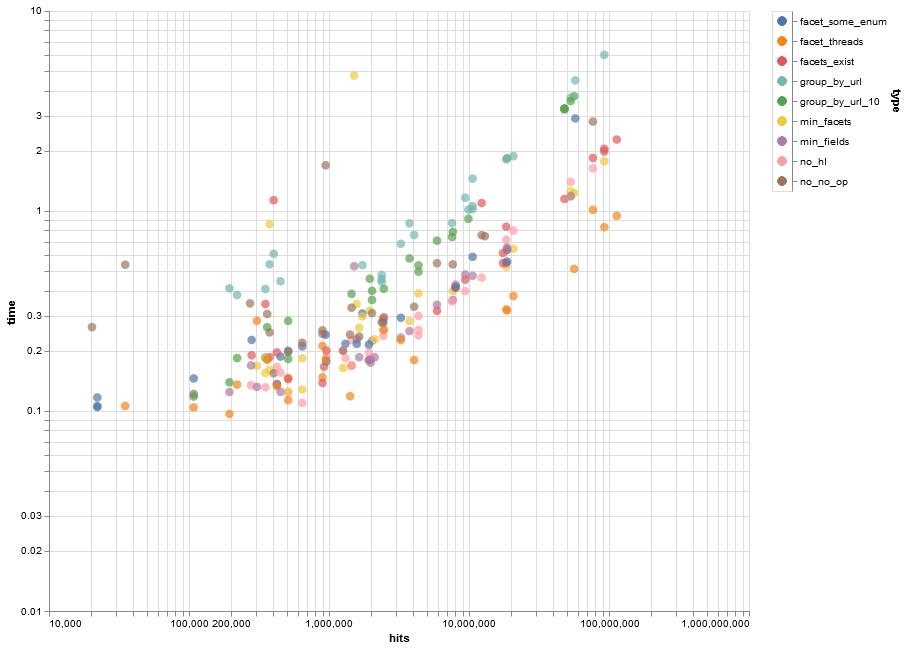

In [136]:
#!pip install altair vega
import altair as alt
alt.renderers.enable('notebook')

def make_plot(df):
    # Based on https://altair-viz.github.io/user_guide/interactions.html#selection-targets-fields-and-encodings
    color = alt.condition(selection,
                          alt.Color('type:N', legend=None),
                          alt.value('lightgray'))

    scatter = alt.Chart(df).mark_circle(size=75).encode(
        alt.X('hits', scale=alt.Scale(type='log', base=10)),
        alt.Y('time', scale=alt.Scale(type='log', base=10)),
        color=color,
        tooltip=['type', 'hits', 'time']
    ).properties(
        width=700,
        height=600
    ).add_selection(
        selection
    )

    legend = alt.Chart(df).mark_circle(size=75).encode(
        y=alt.Y('type', axis=alt.Axis(orient='right')),
        color=color
    ).add_selection(
        selection
    )

    return scatter | legend

make_plot(df_fc2015j)

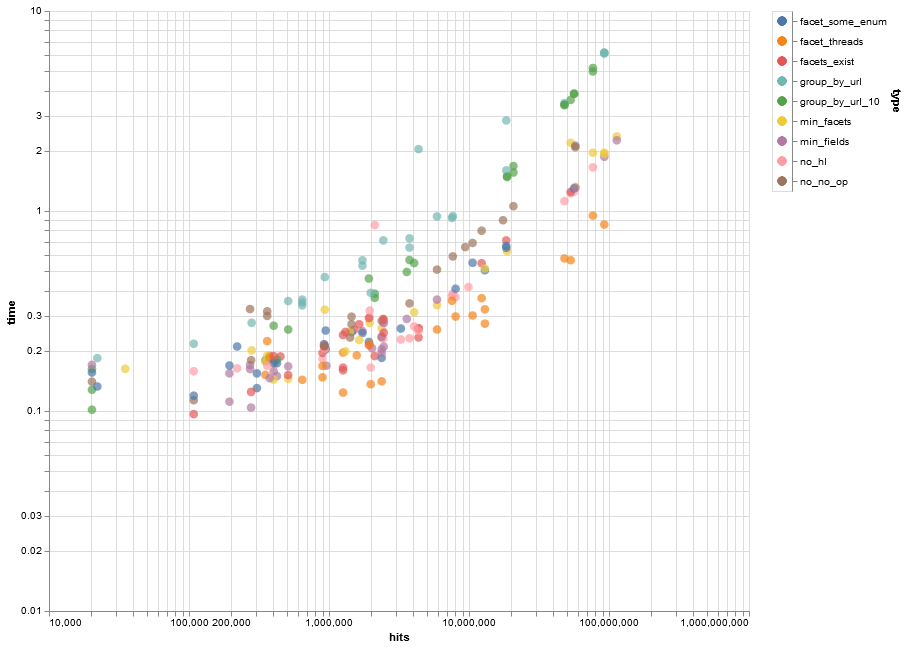

In [134]:
make_plot(df_fc2015r)

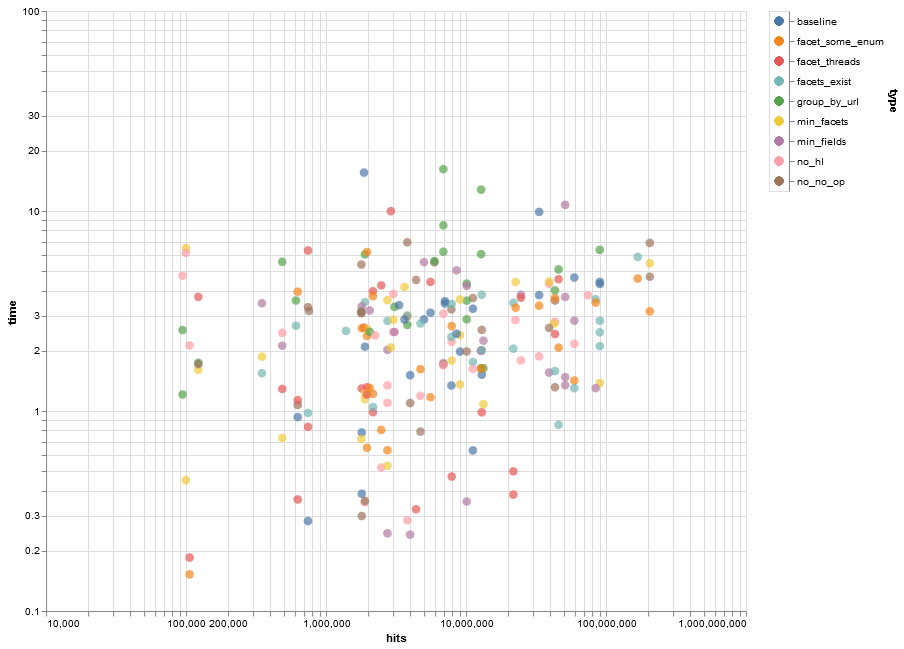

In [125]:
make_plot(df_dc2015)